Given Code

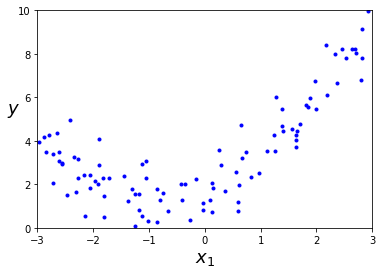

In [ ]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Batch Gradient

Converged at iteration:  450
theta0 = [1.60815603] theta1 = [0.93517143] theta2 = [0.59734001]


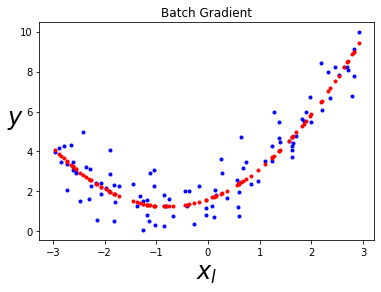

In [ ]:
def gradient_descent(alpha, x, y , endpoint=0.0001, max_iterations=10000):
  converged= False
  iter = 0

  # initialize the thetas
  t0 = np.random.random(x.shape[1])
  t1 = np.random.random(x.shape[1])
  t2 = np.random.random(x.shape[1])

  # total error, J(theta)
  Jt = sum([(t0 + t1*x[i] + t2*x[i]**2 - y[i])**2 for i in range(m)])

  # Iterate Loop
  while not converged:

    # for each training sample, compute the gradient
    gradeintO = 1/m * sum([(t0 + t1*x[i] + t2*x[i]**2 - y[i]) for i in range(m)])
    gradient1 = 1/m * sum([(t0 + t1*x[i] + t2*x[i]**2 - y[i])*x[i] for i in range(m)])
    gradient2 = 1/m * sum([(t0 + t1*x[i] + t2*x[i]**2 - y[i])*x[i]**2 for i in range(m)])

    # update the temp thetas
    temp0 = t0 - alpha* gradeintO
    temp1 = t1 - alpha* gradient1
    temp2 = t2 - alpha* gradient2

    # update thetas
    t0 = temp0
    t1 = temp1
    t2 = temp2

    # mse
    error = sum([(t0 + t1*x[i] + t2*x[i]**2 - y[i])**2 for i in range(m)] )

    if abs(Jt-error) <= endpoint:
      print ('Converged at iteration: ', iter)
      converged = True

    Jt = error # update error
    iter += 1 # update iterations

    if iter == max_iterations:
      print ( 'Exceeded max iterations')
      converged= True

  return t0, t1, t2


if __name__ == '__main__':

  alpha = 0.01 #learning rate
  endpoint = 0.01 # convergence criteria

  #call fxn and get the intercept (theta0) slope(theta1) and quadratic term(theta2)
  theta0, theta1, theta2 = gradient_descent(alpha, X, y, endpoint, max_iterations=1000)
  print ('theta0 = %s theta1 = %s theta2 = %s' %(theta0, theta1, theta2))

  #create plot
  for i in range(X.shape[0]):
    y_predict = theta0 + theta1*X + theta2*X**2

  plt.plot(X,y,"b.")
  plt.plot(X,y_predict,'r.')
  plt.title('Batch Gradient')
  plt.xlabel("$x_l$", fontsize=24)
  plt.ylabel("$y$", rotation =0, fontsize=24)
  plt.show()



stochastic

Converged at iteration: <built-in function iter>
theta0 = [1.7797678] theta1 = [1.0266975] theta2 = [0.63266948]


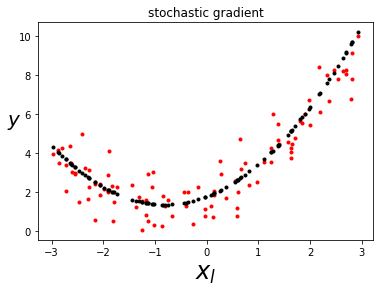

In [ ]:
def s_gradient_descent(alpha,x,y,endpoint=0.0001, max_iterations=10000):
  converged = False
  iteration = 0

  #initialize thetas
  t0 = np.random.random(x.shape[1])
  t1 = np.random.random(x.shape[1])
  t2 = np.random.random(x.shape[1])

  #determine error
  Jt = sum([(t0 + t1*x[i] + t2*x[i]**2 - y[i])**2 for i in range(m)])

  #iterate through the loop
  while not converged:

    for i in range(m):

      #update thetas
      t0 -= alpha * (t0 + t1*x[i] + t2*x[i]**2 - y[i])
      t1 -= alpha * (t0 + t1*x[i] + t2*x[i]**2 - y[i])*x[i]
      t2 -= alpha * (t0 + t1*x[i] + t2*x[i]**2 - y[i])*x[i]**2

      #mse
      error = sum([(t0 + t1*x[i] + t2*x[i]**2 -y[i])**2 for i in range(m)])

    if abs(Jt-error) <= endpoint:
      print('Converged at iteration:' , iter)
      converged = True

    Jt = error
    iteration += 1

    if iter == max_iterations:
      print('Max iterations exceeded')
      converged = True
  return t0, t1, t2

if __name__ == '__main__':

  alpha = 0.01 #learning rate
  endpoint = 0.01 # convergence criteria

  #call fxn and get the intercept (theta0) slope(theta1) and quadratic term(theta2)
  theta0, theta1, theta2 = s_gradient_descent(alpha, X, y, endpoint, max_iterations=1000)
  print ('theta0 = %s theta1 = %s theta2 = %s' %(theta0, theta1, theta2))

  #create plot
  for i in range(X.shape[0]):
    y_predict = theta0 + theta1*X + theta2*X**2

  plt.plot(X,y,"r.")
  plt.plot(X,y_predict,'k.')
  plt.title('Stochastic Gradient')
  plt.xlabel("$x_l$", fontsize=24)
  plt.ylabel("$y$", rotation =0, fontsize=20)
  plt.show()

